# Exercice 3 : Mélange de lait et de crème fraîche


On étudie le mélange du lait non écrémé (35g/kg de matière grasse) avec de la crème fraiche 35% (350 g/kg de matière grasse) pour la préparation d’un dessert. 


1. Calculer la masse volumique du lait non écrémé et de la crème fraiche. On considère que ces deux fluides sont un mélange de lait écrémé (masse volumique 1035,5 kg/m3) et de matière grasse (masse volumique 952,6 kg/m3).

>Les masses volumiques ne s'aditionnent pas : $\rho_T \ne \rho_A+\rho_B$ mais on peut additionner 
>
>- des masses $m_T = m_A + m_B $ soit $V_T \rho_T = V_A \rho_A + V_B \rho_B$ 
>
>ou
>- des volumes $V_T  = V_A + V_B$ soit $\frac{m_T}{\rho_T} = \frac{m_A}{\rho_A}+\frac{m_B}{\rho_B}$ ce qui peut s'écrire : 
>$\frac{1}{\rho_T} = \frac{w_A}{\rho_A}+\frac{w_B}{\rho_B}$
>
>La masse volumique d'un mélange (ici du lait écrémé mélangé à de la matière grasse) s'écrit
$$\frac{1}{\rho_M} = \frac{w_{Lait écrémé}}{\rho_{Lait écrémé}}+\frac{w_{MG}}{\rho_{MG}}$$

In [1]:
rho_lait_ecreme=1035.5     #kg.m-3 Masse volumique du lait écrémé
rho_MG  =952.6             #kg.m-3 Masse volumique de la matière grasse (MG)
x_MG_creme=0.35
x_MG_lait=0.035

#Calcul de la masse volumique de la crème à 35 % de MG
rho_creme=1/((1-x_MG_creme)/rho_lait_ecreme+x_MG_creme/rho_MG)
print('La masse volumique de la crème fraiche est de {:.2f} kg/m3 ou de {:.5f} kg/L'.format(rho_creme, rho_creme/1000))

#Calcul de la masse volumique du lait à 3.5 % de MG
rho_lait=1/((1-x_MG_lait)/rho_lait_ecreme+x_MG_lait/rho_MG)
print('La masse volumique du lait (non écrémé) est de {:.2f} kg/m3 ou de {:.5f} kg/L'.format(rho_lait, rho_lait/1000))

print ('Les résultats sont cohérents si la masse volumique diminue quand il y a de la matière grasse (car la masse volumique de la matière grasse est plus faible')




La masse volumique de la crème fraiche est de 1004.89 kg/m3 ou de 1.00489 kg/L
La masse volumique du lait (non écrémé) est de 1032.36 kg/m3 ou de 1.03236 kg/L
Les résultats sont cohérents si la masse volumique diminue quand il y a de la matière grasse (car la masse volumique de la matière grasse est plus faible


Dans le procédé agroalimentaire, on mélange une cuve de lait et une cuve de crême fraiche en soutirant un débit de ces deux cuves que l'on mélange ensuite dans un mélangeur. Pour déterminer les débits on mesure la hauteur des cuves qui font 1,5 m de diamètre. Les hauteurs dans les cuves diminuent de 5 cm et de 3 cm toutes les minutes pour la cuve de lait et de crème fraiche respectivement.

2. Faites le schéma du mélangeur en précisant les données connues et inconnues.

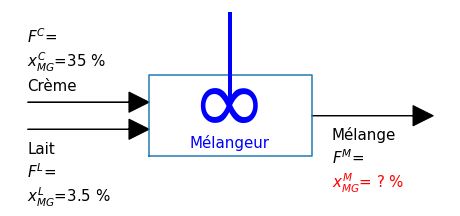

In [2]:
import matplotlib.pyplot as plt
xs, ys = 40, 40       #position du melangeur
lx, ly = 40, 20       #taille du melangeur
la, hla, hwa=25, 5,5  #taille des fleches

#tracé du flowsheet
def plot_flowsheet_melangeur():
    fig, ax = plt.subplots(figsize=(8, 8)) 
    ax.set_aspect( 1 )
    plt.axis('off')
    plt.plot([xs,xs+lx,xs+lx,xs,xs],[ys,ys,ys+ly,ys+ly,ys])
    plt.plot([60,60],[75,54],'b',linewidth=4)
    plt.text(xs+10,ys+6,r"$\infty$",size=92,color='b')
    plt.arrow(xs-la-hla,ys+ly/3,la,0, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.arrow(xs-la-hla,ys+2*ly/3,la,0, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.arrow(xs+lx,ys+ly/2,la,0, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.text(50,42,'Mélangeur',c='b', size=15)
    plt.text(xs-la-hla,ys+ly/3-12, r"$F^L$"+'= ', size=15)
    plt.text(xs-la-hla,ys+ly/3-18, r"$x^L_{MG}$"+'={:.1f} %'.format(x_MG_lait*100), size=15)
    plt.text(xs-la-hla,ys+ly/3-6, 'Lait', size=15)
    plt.text(xs-la-hla,ys+ly+8, r"$F^C$"+'=', size=15)
    plt.text(xs-la-hla,ys+ly+2, r"$x^C_{MG}$"+'={:.0f} %'.format(x_MG_creme*100), size=15)
    plt.text(xs-la-hla,ys+ly-4, 'Crème', size=15)
    plt.text(xs+lx+5,ys+ly/2-12, r"$F^M$"+'=', size=15)
    plt.text(xs+lx+5,ys+ly/2-6, 'Mélange', size=15)
plot_flowsheet_melangeur()
plt.text(xs+lx+5,ys+ly/2-18, r"$x^M_{MG}$"+'= ? %', size=15, color='r')
plt.show()

3. Calculer les débits massiques et volumiques du lait et de la crème fraiche avant le mélangeur.

> A l'aide de la variation de hauteur, $\Delta H$, pendant le temps, $\Delta t$, on peut en déduire le volume perdu dans la cuve par unité $\frac{\Delta V}{\Delta t}$ qui correspond à un débit volumique, $F_V$ :
$$F_V=S\frac{\Delta H}{\Delta t}=\frac{\Delta V}{\Delta t}$$
>où $S$ est la section de la cuve (il vous faut connaître le périmètre, la surface et le volume des principales géométries) 
> Le débit massique, $F_M$, est alors :
$$F_M=\rho~F_V$$
>où $\rho$ est la masse volumique du fluide qui s'écoule.

In [3]:
import numpy as np
DH_lait=0.05   #m
DH_creme=0.03 #m
DT=60       #s
D_cuve=1.5    #m
S=np.pi*(D_cuve/2)**2 #m2 section de la cuve

#Calcul du débit volumique et massique
FV_lait=S*DH_lait/DT #m3/s
FV_creme=S*DH_creme/DT #m3/s
print('Le débit volumique du lait est de {:.2e} m3/s ou de {:.2f} L/h'.format(FV_lait, FV_lait*1000*3600))
print('Le débit volumique de la crème est de {:.2e} m3/s ou de {:.2f} L/h'.format(FV_creme, FV_creme*1000*3600))

FM_lait=rho_lait*FV_lait    #kg/s
FM_creme=rho_creme*FV_creme #kg/s
print('')
print('Le débit massique du lait est de {:.2e} kg/s ou de {:.2f} kg/h'.format(FM_lait, FM_lait*3600))
print('Le débit massique de la crème est de {:.2e} kg/s ou de {:.2f} kg/h'.format(FM_creme, FM_creme*3600))

Le débit volumique du lait est de 1.47e-03 m3/s ou de 5301.44 L/h
Le débit volumique de la crème est de 8.84e-04 m3/s ou de 3180.86 L/h

Le débit massique du lait est de 1.52e+00 kg/s ou de 5472.97 kg/h
Le débit massique de la crème est de 8.88e-01 kg/s ou de 3196.42 kg/h


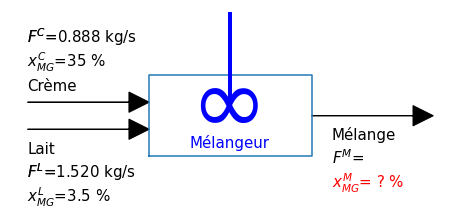

In [4]:
plot_flowsheet_melangeur()
plt.text(xs+lx+5,ys+ly/2-18, r"$x^M_{MG}$"+'= ? %', size=15, color='r')
plt.text(xs-la-hla,ys+ly/3-12, r"$F^L$"+'={:.3f} kg/s'.format(FM_lait), size=15)
plt.text(xs-la-hla,ys+ly+8, r"$F^C$"+'={:.3f} kg/s'.format(FM_creme), size=15)
plt.show()

4. Calculer le débits massique et volumique du lait et de la crème fraiche après le mélangeur.

>Lorsqu'on fonctionne en continu (le mélangeur est donc plein de liquide), le débit global en sortie est égale à la somme des débits entrants soit :
$$\sum{F_{sortant}}=\sum{F_{entrant}}$$
> Dans le cas présent, il y a une sortie et deux entrées : le lait et la crème. Le bilan s'écrit donc :
$$F_{mélange}=F_{lait}+F_{crème}$$
> On peut écrire ce bilan sur les débits volumiques (si on néglige les volumes de mélange) et sur les débits massiques.


Le débit volumique en sortie du mélangeur est de 2.36e-03 m3/s ou de 8482.30 L/h
Le débit massique en sortie du mélangeur est de 2.41e+00 kg/s ou de 8669392.78 g/h


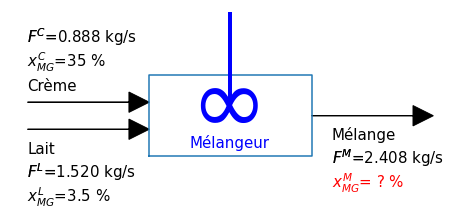

In [5]:
FV_mel=FV_lait+FV_creme
FM_mel=FM_lait+FM_creme
print('Le débit volumique en sortie du mélangeur est de {:.2e} m3/s ou de {:.2f} L/h'.format(FV_mel, FV_mel*1000*3600))
print('Le débit massique en sortie du mélangeur est de {:.2e} kg/s ou de {:.2f} g/h'.format(FM_mel, FM_mel*1000*3600))
plot_flowsheet_melangeur()
plt.text(xs+lx+5,ys+ly/2-18, r"$x^M_{MG}$"+'= ? %', size=15, color='r')
plt.text(xs-la-hla,ys+ly/3-12, r"$F^L$"+'={:.3f} kg/s'.format(FM_lait), size=15)
plt.text(xs-la-hla,ys+ly+8, r"$F^C$"+'={:.3f} kg/s'.format(FM_creme), size=15)
plt.text(xs+lx+5,ys+ly/2-12, r"$F^M$"+'={:.3f} kg/s'.format(FM_mel), size=15)
plt.show()

5. Quel est le temps de séjour moyen dans le mélangeur d’un volume de 1 L ?

>Le temps de séjour dans le mélangeur est définit comme le rapport du volume de l'appareil sur le débit volumique qui s'écoule dans l'appareil :
$$t_s=V/FV_{mélange}$$


In [6]:
V=1      #L
V=V/1000 #m3

ts=V/FV_mel
print('Le temps de séjour d une molécule dans le mélangeur est de {:.2f} s'.format(ts))


Le temps de séjour d une molécule dans le mélangeur est de 0.42 s


6. Calculer le pourcentage massique en matière grasse en sortie du mélangeur.

> La quantité de matière grasse qui sort doit être égale à la quantité de matière grasse qui rentre avec le lait à 3,5 % et celle qui rentre avec la crème à 35%. La quantité de MG qui sort dans le mélange est le débit partiel est matière grasse c'est à dire $F^M_{MG}=F^M~x^M_{MG}$. On peut de la même façon écrire le débit partiel en matière grasse qui rentre avec le lait $F^L_{MG}=F^L~x^L_{MG}$ et le débit partiel en matière grasse qui rentre avec la crème $F^C_{MG}=F^C~x^C_{MG}$. 
>
>On peut alors écrire :
$$F^M_{MG}=F^L_{MG}+F^C_{MG}$$
>et ainsi en déduire $x^M_{MG}$

In [7]:
FM_MG_lait=FM_lait*x_MG_lait     #kg de MG/s
FM_MG_creme=FM_creme*x_MG_creme  #kg de MG/s
FM_MG_mel=FM_MG_lait+FM_MG_creme #kg de MG/s
x_MG_mel=FM_MG_mel/FM_mel

print('La fraction massique en matière grasse est de {:.4f} dans le mélange'.format(x_MG_mel))

La fraction massique en matière grasse est de 0.1511 dans le mélange


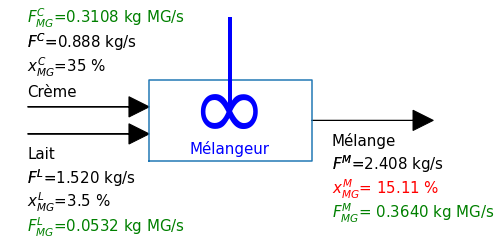

In [8]:
plot_flowsheet_melangeur()
plt.text(xs+lx+5,ys+ly/2-18, r"$x^M_{MG}$"+'= {:.2f} %'.format(x_MG_mel*100), size=15, color='r')
plt.text(xs-la-hla,ys+ly/3-12, r"$F^L$"+'={:.3f} kg/s'.format(FM_lait), size=15)
plt.text(xs-la-hla,ys+ly+8, r"$F^C$"+'={:.3f} kg/s'.format(FM_creme), size=15)
plt.text(xs+lx+5,ys+ly/2-12, r"$F^M$"+'={:.3f} kg/s'.format(FM_mel), size=15)
plt.text(xs-la-hla,ys+ly+14, r"$F^C_{MG}$"+'={:.4f} kg MG/s'.format(FM_MG_creme), size=15, color='g')
plt.text(xs-la-hla,ys+ly/3-24, r"$F^L_{MG}$"+'={:.4f} kg MG/s'.format(FM_MG_lait), size=15, color='g')
plt.text(xs+lx+5,ys+ly/2-24, r"$F^M_{MG}$"+'= {:.4f} kg MG/s'.format(FM_MG_mel), size=15, color='g')
plt.show()

> Un dernier coup d oeil permet de vérifier que tout semble correct ! Il n'y a plus qu'à rajouter les oeufs !